## Test that the Policy Gradient model learns to play tic tac toe: 
### 1. 2000 (epochs) x 30 (batch size) > 2*3^9 so the agent will have probably seen every possible board position. Training takes about 6 mins.
### 2. learning rate = 0.1

## A. Baseline model with zero learning(i.e. learning rate set to zero):

In [7]:
import numpy as np
import tensorflow as tf
from tic_tac_learning import simulator
from tic_tac_pg import policy_gradients
from stochastician import stochastician as CS
from tic_tac_system import tic_tac_system
from evaluation import game_evaluation as G

G = G()

tf.reset_default_graph()

pg_model = policy_gradients(lr=0.001,seed=42,batch_size=10,max_iter=3)

tic_tac = tic_tac_system(G,model=pg_model,opponent=CS,epochs=1000,depth=5,gamma=0.9)

scores = simulator(tic_tac)

0
100
200
300
400
500
600
700
800
900


/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/aidanrockea/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


## Analyse win-rate progression: 

In [8]:
learning = np.zeros(10)

for i in range(10):
    
        learning[i] = np.mean((scores[i*100:(i+1)*100]+5.0)/10)

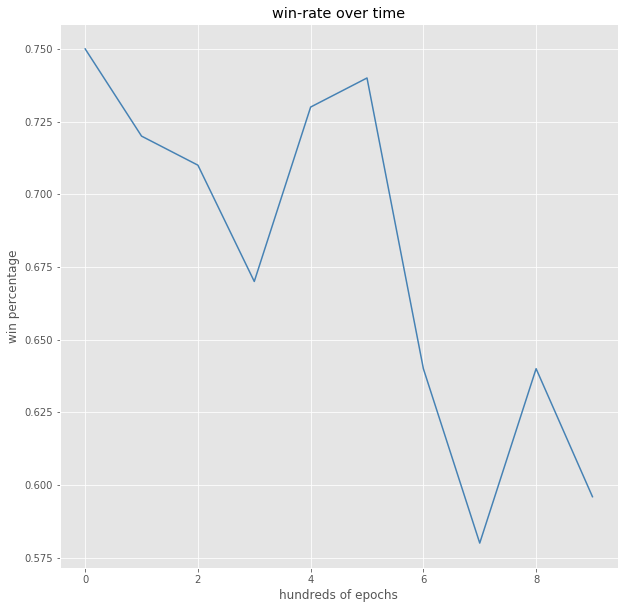

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

plt.plot(learning,color='steelblue')

plt.title('win-rate over time')
plt.xlabel('hundreds of epochs')
plt.ylabel('win percentage')

plt.show()

In [11]:
np.mean(learning[:5]),np.mean(learning[5:10])

(0.716, 0.6391919191919192)

## The win-rate is about 56% which is unimpressive. But, zero learning is going on so this is to be expected. 

## B. Using simple softmax probability calculations: 

In [ ]:
import numpy as np
import tensorflow as tf
from tic_tac_learning import simulator
from tic_tac_pg import policy_gradients
from stochastician import stochastician as CS
from tic_tac_system import tic_tac_system
from evaluation import game_evaluation as G

tf.reset_default_graph()

G = G()

pg_model = policy_gradients(lr=0.01,seed=42,batch_size=30)

tic_tac = tic_tac_system(G,model=pg_model,opponent=CS,epochs=2000,depth=5,gamma=0.9)

scores = simulator(tic_tac)

## Analyse the win-rate progression: 

In [ ]:
learning = np.zeros(20)

for i in range(20):
    
    learning[i] = np.mean((scores[i*100:(i+1)*100]+5.0)/10)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

plt.plot(learning,color='steelblue')

plt.title('win-rate over time')
plt.xlabel('hundreds of epochs')
plt.ylabel('win percentage')

plt.show()

In [ ]:
np.mean(learning[:5]), np.mean(learning[5:10]),np.mean(learning[10:15]),np.mean(learning[15:20])

### The win rate appears to converge to 74% and then it starts to go down a bit. Perhaps a decreasing learning rate might help. 